Corinne 7-14

In [1]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding
from sklearn.metrics.pairwise import euclidean_distances
from scipy import stats
from sklearn.decomposition import PCA

In [2]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'

### Concatenate and Plot ###

In [6]:
reducer = PCA(n_components=2, random_state=42)

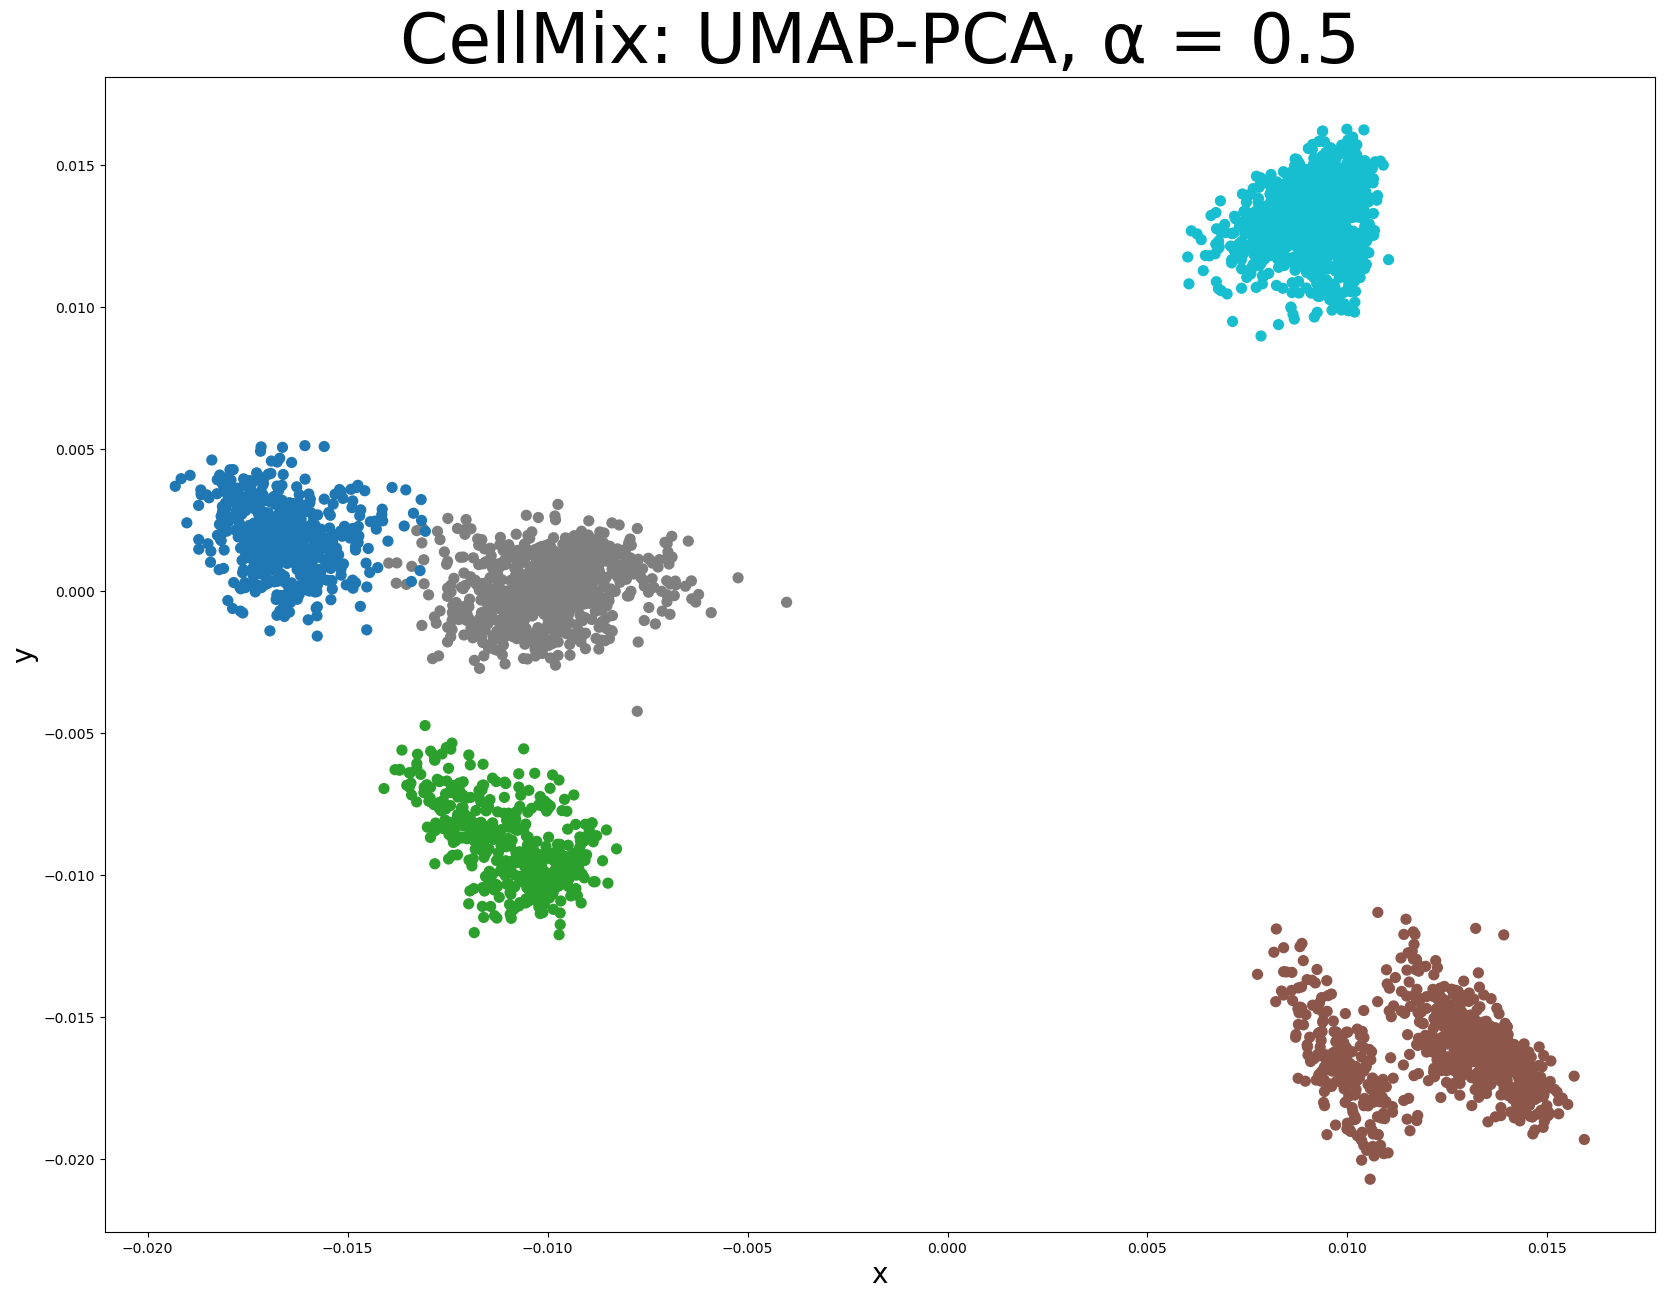

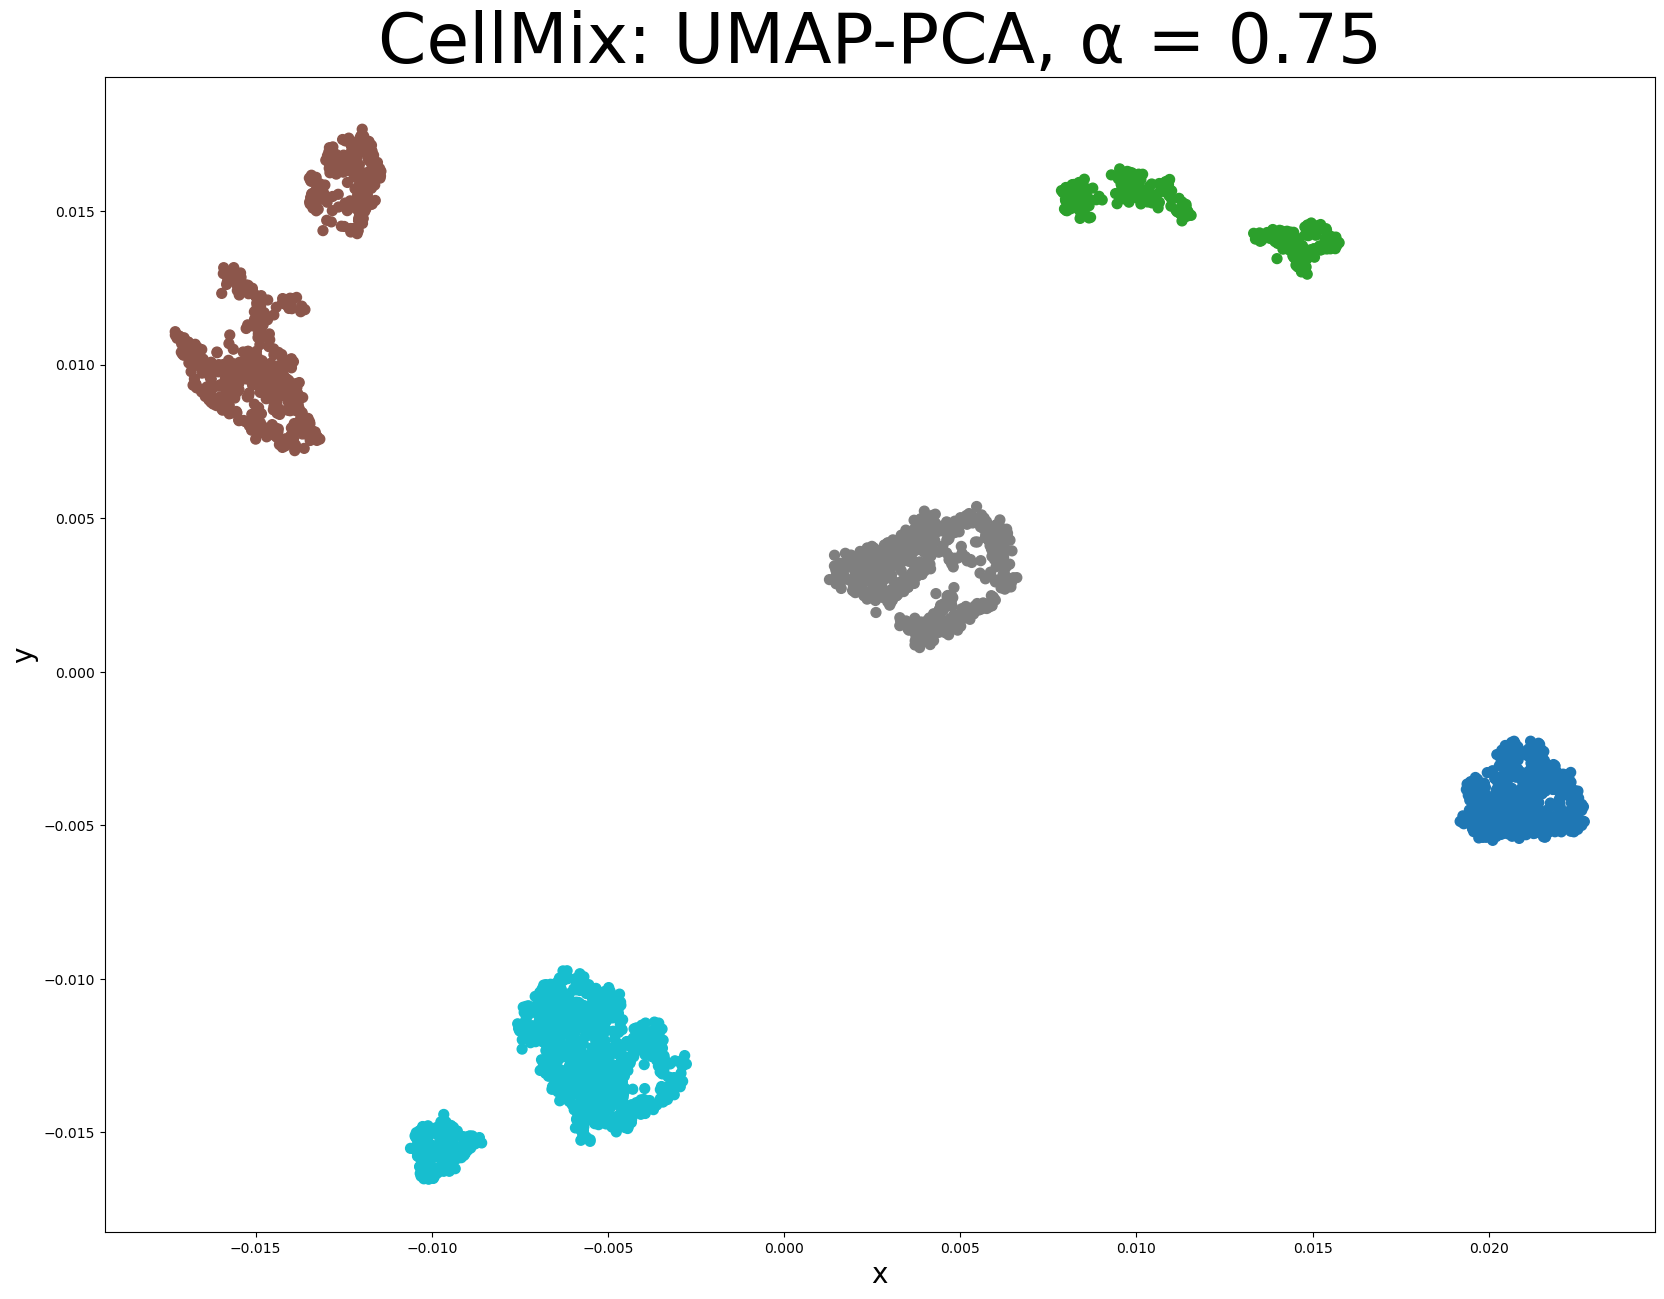

In [7]:
#datasets = ['CAFs', 'CellMix', 'CellMixLA','Duo4eq', 'Duo8eq','Kang','MNIST','Muraro','TMLung','TMLungLA','TMPanc','TMPancLA']
datasets = ['CellMixLA','Duo4eq', 'Duo8eq']
alpha_list = [0.25, 0.5,0.75]

for dataset in datasets:
    # load embeddings
    emb_path = path + 'embeddings/' + dataset + '/'
    pcaM = np.load(emb_path + dataset +'_pca.npy')
    umapM = np.load(emb_path + dataset +'_umap.npy')

    # load appropriate y_train
    if dataset == 'CAFS':
        expr = pd.read_csv(path + 'data/CAFs.txt', sep='\t')
        y_train = expr.values[:,expr.shape[1]-1]

    elif dataset == 'CellMix':
        df = pd.read_csv(path + 'data/pcadata_CellMix.csv')
        y_train = df.values[:,df.shape[1]-1]
    
    elif dataset == 'CellMixLA':
        df = pd.read_csv(path + 'data/pcadata_CellMix_WithLocAvg.csv')
        y_train = df.values[:,df.shape[1]-1]    

    elif dataset == 'Duo4eq':
        y_train = np.load(path + "data/"+ "4eq_labels.npy")
    
    elif dataset == 'Duo8eq':
        y_train = np.load(path + "data/"+ "8eq_labels.npy")

    elif dataset == 'Kang':
        y_train = np.load(path + "data/"+ "kang_labels.npy")

    elif dataset == 'MNIST':
        from sklearn import datasets
        mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False)
        y_train = mnist.target.astype(int)
    
    elif dataset == 'Muraro':
        y_train = np.load(path + "data/"+ "muraro_labels.npy")
    
    elif dataset == 'TMLung':
        df = pd.read_csv(path + 'data/pcadata_TMLung.csv')
        y_train = df.values[:,df.shape[1]-1]
    
    elif dataset == 'TMLungLA':
        df = pd.read_csv(path + 'data/pcadata_TMLung_WithLocAvg.csv')
        y_train = df.values[:,df.shape[1]-1]

    elif dataset == 'TMPanc':
        df = pd.read_csv(path + 'data/pcadata_TMPanc.csv')
        y_train = df.values[:,df.shape[1]-1]

    elif dataset == 'TMPancLA':
        df = pd.read_csv(path + 'data/pcadata_TMPanc_WithLocAvg.csv')
        y_train = df.values[:,df.shape[1]-1]
    
    # get and plot embeddings
    for alpha in alpha_list:
        # scale UMAP, PCA embeddings by alpha, (1-alpha) respectively
        umapM_sc = umapM * (alpha) # sc for scaled
        pcaM_sc = pcaM * (1-alpha)
        # concatenate
        concat_emb = np.concatenate((pcaM_sc,umapM_sc), axis=1)
        # reduce with PCA
        y = reducer.fit_transform(concat_emb)
        y = y / LA.norm(y) # normalize scale to 1
        
        # save embedding y
        #np.save(emb_path + 'UMAP-PCA/' + dataset + '_up_' + str(alpha) + '.npy', y)
        
        # plot
        plt.figure(figsize=(20,15))

        # for Kang
        #colors = ['#1f77b4','#ff7f0e','#0d5e02','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#9ccf00','#07c1ef','#23199d','#099b95','#f6bf00'] # Kang
        #mapped_colors = [colors[int(value-1)] for value in y_train]
        #plt.scatter(y[:,0], y[:,1], s = 50, c=mapped_colors) # Kang

        plt.scatter(y[:,0], y[:,1], s = 50, c=y_train, cmap='tab10')
        # tSNE_PCA: \u03B1 = 0.75
        plt.title(dataset + ": UMAP-PCA, \u03B1 = " + str(alpha), fontsize = 50)
        plt.xlabel("x", fontsize = 20); plt.ylabel("y", fontsize = 20)
        plt.show()

### Plot just one (just in case) ###

In [81]:
y = np.load(emb_path + 'UMAP-PCA/' + dataset + '_up_0.25.npy')

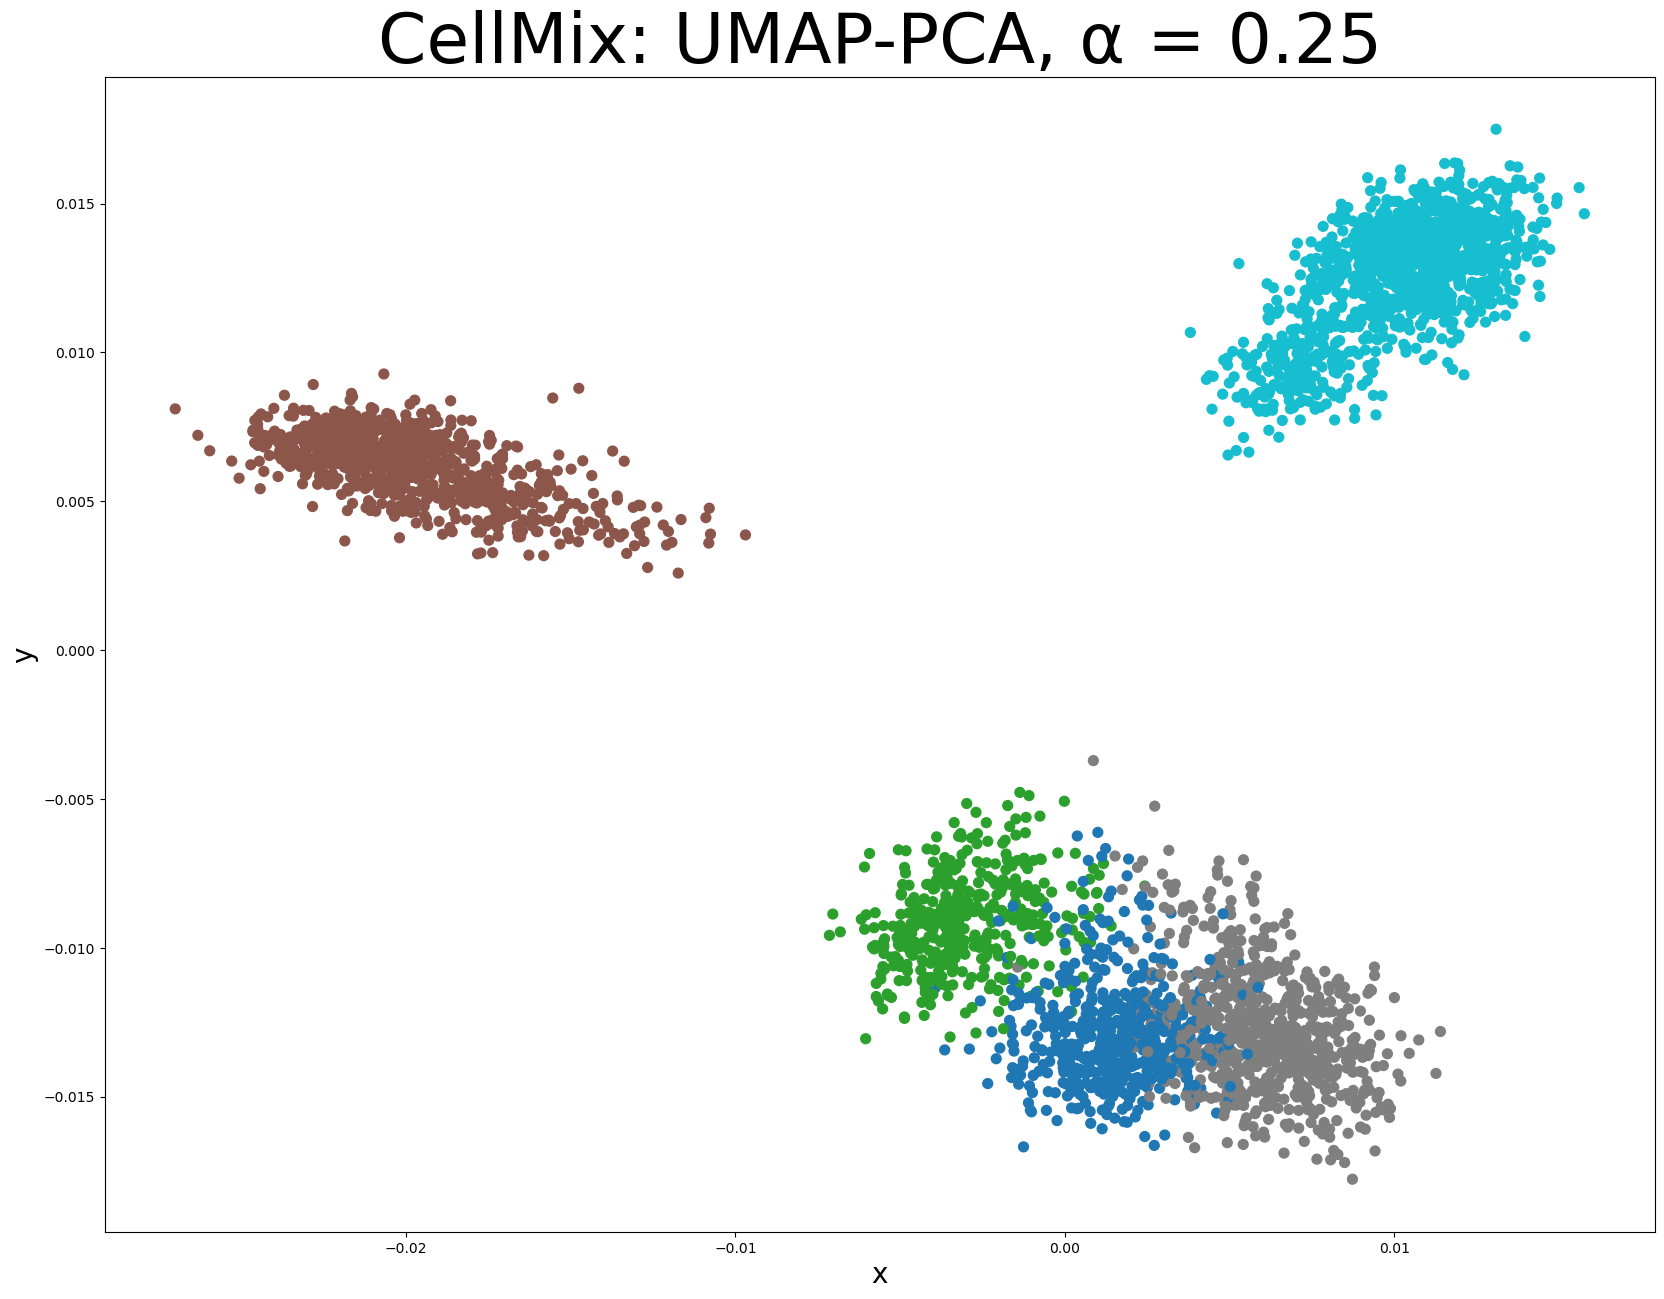

In [83]:
plt.figure(figsize=(20,15))

# for Kang
#colors = ['#1f77b4','#ff7f0e','#0d5e02','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#9ccf00','#07c1ef','#23199d','#099b95','#f6bf00'] # Kang
#mapped_colors = [colors[int(value-1)] for value in y_train]
#plt.scatter(y[:,0], y[:,1], s = 50, c=mapped_colors) # Kang

plt.scatter(y[:,0], y[:,1], s = 50, c=y_train, cmap='tab10')
# tSNE_PCA: \u03B1 = 0.75
plt.title(dataset + ": UMAP-PCA, \u03B1 = " + str(0.25), fontsize = 50)
plt.xlabel("x", fontsize = 20); plt.ylabel("y", fontsize = 20)
plt.show()